###Markov Chain Monte Carlo (MCMC) Methodology

MCMC are a popular class of ML algorithms. Any probabilistic model exists in high dimensional parameter space and it is described by high dimensional parameter space MCMC is a methodology of smapling this high dimensional space to approximate the posterior distribution $p(\theta|x)$.


The method is popular in Bayesian statistics because it allows one to estimate high dimensional posterior distributions using sampling. The basic idea is to **construct a Markov chain whose stationary distribution is equal to the target posterior  $p(\theta|x)$**.

MCMC is preferred when the marginal likelihood (evidence) $p(x)$ is intractable and cannot be solved analytically.

A few algorithms selected for application in sampling from probabilistic graphical models (PGMs).

**A mixture of Gaussians**

In a pairplot matrix, the off-diagonal entries contain a scatter plot of every feature against other feature, while the diagonal entries contain plots of every feature against itself by n-categories. The pairplot captures pairwise relationships in the dataset. We can focus on the main diagonal and try to model the data we see. For three categories, we can model the data as a mixture of three Gaussian distributions, and a Gaussian mixture is the weighted sum of Gaussian probability distributions.

**Sum of K-Gaussians**

Gaussian mixture as a weighted sum of Gaussian prob. distributions

$$ p(x|\theta) = \sum_{k=1}^{K} \pi_k N(x | \mu_k, \Sigma_k) $$

We look to find the Gaussian mixture parameters via theexpectation-maximization EM algorithm

**Posterior Distribution**

Given a model with parameters theta, we try to fit for the observed data x that is the probability of parameters given the data $p(\theta|x)$.

Let's consider the Bernoulli random variable, coin is biased with bias $\theta$ -- coin is H ith prob. $\theta$ and T with prob. $1 -\theta$. The pmf of the Bernoulli random variable

$$ p(x | \theta) = \theta^x (1 - \theta)^{1-x}, \quad x \in \{0, 1\} $$

The likelihood function for n iid.s

$$ \text{Let } D = \{x_1, \dots, x_n\} \text{ be a sequence of iid samples, then} $$

$$ L(\theta | D) = p(D | \theta) = p(x_1, \dots, x_n | \theta) = \prod_{i=1}^{n} p(x_i | \theta) = p(\mathcal{D} | \theta) = \theta^{N_1} (1 - \theta)^{N_0}$$

$$ p(\theta; \alpha, \beta) = \frac{1}{B(\alpha, \beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} $$



Joint probability function and Log joint function

$$ p(x_1, \dots, x_n) = p(x_1) \prod_{i=2}^{n} p(x_i | x_{i-1}) $$
$$ \log p(x_{1:n}) = \log p(x_1) + \sum_{i=2}^{n} \log p(x_i | x_{i-1}) $$

**Markov Chain for Page Rank**
$$
p(x_1, \dots, x_n) = p(x_1) \prod_{i=2}^{n} p(x_i | x_{i-1}) = p(x_1) p(x_2 | x_1) \dots p(x_n | x_{n-1})
$$

**Estimating PI** is a classic example of Monte Carlo integration and has an advantage over numerical integration that evaluates the function at a fixed grid of points. MC evaluates where there is non negliglble probability and scales better with high dimensional problems.  

**Binomial Tree** is another example of MC sampling for applications in finance.

Model the stock price, assume at each time step the stock could be either up or down with unequal payoffs, characterists for risky assets.

The initial stock at time t =0 is 1, next time at time 1 the stock price is either up or down state indicated with u and d.  Model it as a binamial tree model with up state having transition probability $p$, and down state having the probability $1-p$.

Binomial Model Algorithm

\begin{aligned}
&\text{{Binomial Model} }(\mu, \sigma, S_0, N, T, \Delta t): \\
&\quad 1. \quad u = e^{\sigma \sqrt{T/N}} && \text{(Up-price factor)} \\
&\quad 2. \quad d = \frac{1}{u} && \text{(Down-price factor)} \\
&\quad 3. \quad p = \frac{1}{2} + \frac{1}{2} \left( \frac{\mu}{\sigma} \right) \sqrt{\frac{T}{N}} && \text{(Up-state transition prob.)} \\
&\quad 4. \quad N_{up} \sim \text{Binomial}\left(\frac{T}{\Delta t}, p\right) && \text{(Number of up steps)} \\
&\quad 5. \quad N_{down} = \frac{T}{\Delta t} - N_{up} && \text{(Number of down steps)} \\
&\quad 6. \quad S_{final} = S_0 \cdot u^{N_{up}} \cdot d^{N_{down}} && \text{(Final state calculation)} \\
&\quad 7. \quad \text{Return } S_{final}
\end{aligned}



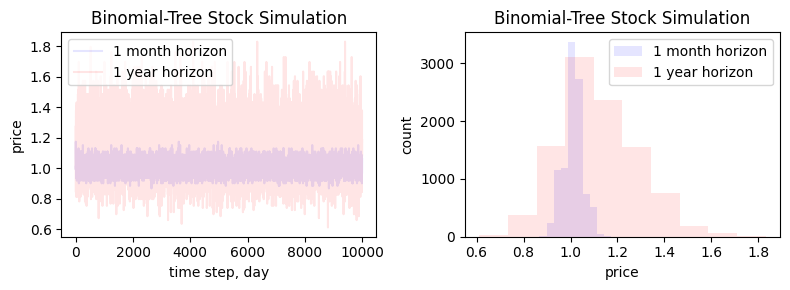

In [ ]:
""" model parameters

mu =0.1 -- sigma =0.15 -- S_start =1 -- N =10000 -- T =[21.00/252, 1.0] -- step =1.00/252 -- binomial_tree(mu, sigma, S_start, N, T, step)
"""

**Gibbs sampling - Multivariate Gaussians**

Sampling is one variable at a time from a multidimensional distribution conditioned on the latest samples from all the other variables. For example, given a starting sample $x^k$, for a d=3 dimensional distribution, we generate the next sample $x^{k+1}$.

\begin{aligned}
x_1^{(k+1)} &\sim p(x_1 \mid x_2^{(k)}, x_3^{(k)}) \\
x_2^{(k+1)} &\sim p(x_2 \mid x_1^{(k+1)}, x_3^{(k)}) \\
x_3^{(k+1)} &\sim p(x_3 \mid x_1^{(k+1)}, x_2^{(k+1)})
\end{aligned}

The distributoions are called fully conditioned distributions.

The naive Gibbs sampling algorithm is sequential with number of steps proportional to the dimensionality of the distribution. The Gibbs sampling is applicable to scenarios with fully conditioned distributions easy to compute; like **the case with multivariate Gaussians with PDF**.


$$N(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$

Let's partition the Gaussian vector into two sets $x{1:D} = (x_A, x_B)$ with parameters mu vector and Sigma matrix. Then we give the fully conditioned distribution.

**Fully Conditioned PDF** (Christopher Bishop's Pattern recognition)

$$
p(\mathbf{x}_A \mid \mathbf{x}_B) = N(\mathbf{x}_A \mid \boldsymbol{\mu}_{A|B}, \boldsymbol{\Sigma}_{A|B})
$$


\begin{aligned}
\boldsymbol{\mu}_{A|B} &= \boldsymbol{\mu}_A + \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} (\mathbf{x}_B - \boldsymbol{\mu}_B) \\
\boldsymbol{\Sigma}_{A|B} &= \boldsymbol{\Sigma}_{AA} - \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} \boldsymbol{\Sigma}_{BA}
\end{aligned}




**Gibbs Sampling Algorithm**

The Gibbs Gaussian class has two functions, the gaussian conditional that computes the gaussian distribution $p(x_a|x_B)$ for any set of variables $set_A$ and $set_B$. The $set_A$ is the input, the $set_B$ is the difference between unviersal set U and the $set_A$.

We sample one dimension at a time while conditioning the distribution on the other dimensions. We cycle through available dimensions and compute the distribution for each iteration, which is what the sampling function does.

For each sample, we iterate over each dimension and compute the mean and covariance of the Gaussian conditional distrobution - from which we take and record a sample, and we repeat the process until number of samples is reached.

$
\begin{aligned}
&\textbf{Gibbs Sampling Algorithm} \\
&\text{{Class} GibbsGaussian:} \\
&\quad \text{Function } \text{GaussConditional}(\boldsymbol{\mu}, \boldsymbol{\Sigma}, A, \mathbf{x}): \\
&\quad\quad setU = \{1, \dots, \text{dim}(\boldsymbol{\mu})\} && \text{(Universal set)} \\
&\quad\quad setB = setU \setminus A && \text{(Complementary set)} \\
&\quad\quad \mathbf{x}_B = \mathbf{x}[B], \quad \boldsymbol{\mu}_A = \boldsymbol{\mu}[A], \quad \boldsymbol{\mu}_B = \boldsymbol{\mu}[B] \\
&\quad\quad \boldsymbol{\mu}_{A|B} = \boldsymbol{\mu}_A + \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} (\mathbf{x}_B - \boldsymbol{\mu}_B) \\
&\quad\quad \boldsymbol{\Sigma}_{A|B} = \boldsymbol{\Sigma}_{AA} - \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} \boldsymbol{\Sigma}_{BA} \\
&\quad\quad \textbf{return } \boldsymbol{\mu}_{A|B}, \boldsymbol{\Sigma}_{A|B} \\
&\quad \text{Function } \text{Sample}(\boldsymbol{\mu}, \boldsymbol{\Sigma}, \mathbf{x}_{init}, S): \\
&\quad\quad \mathbf{x} = \mathbf{x}_{init} \\
&\quad\quad \text{for } s = 1 \text{ to } S: \\
&\quad\quad\quad \text{for } d = 1 \text{ to } \text{dim}: \\
&\quad\quad\quad\quad \boldsymbol{\mu}_{A|B}, \boldsymbol{\Sigma}_{A|B} = \text{Gauss\_Conditional}(\boldsymbol{\mu}, \boldsymbol{\Sigma}, \{d\}, \mathbf{x}) \\
&\quad\quad\quad\quad x_d \sim N(\boldsymbol{\mu}_{A|B}, \boldsymbol{\Sigma}_{A|B}) && \text{(Gibbs Update)} \\
&\quad\quad\quad \text{end for} \\
&\quad\quad\quad \text{samples}[s, :] = \mathbf{x} \\
&\quad\quad \text{end for} \\
&\quad\quad \textbf{return } \text{samples}
\end{aligned}
$

**2D Gaussian distribution example**

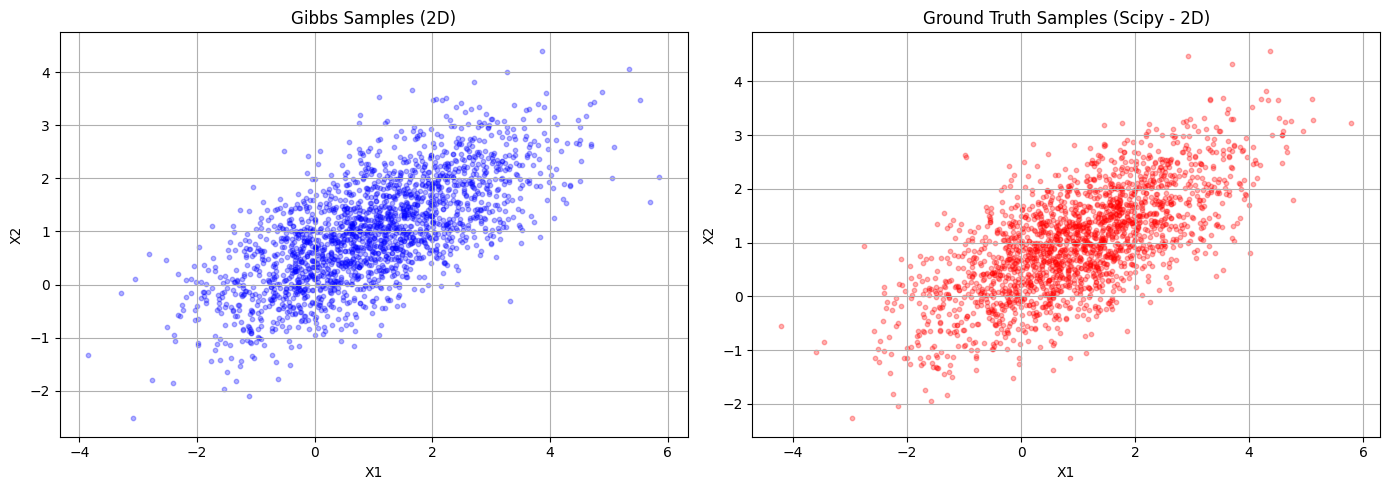

In [ ]:
""" Gibbs Sampling of Multivariate Gaussian

num_samples = 2000 -- mu = [1, 1] -- Sigma = [[2,1], [1,1]] -- xinit = np.random.rand(len(mu),1) -- num_s = 1000
Gibbs Samples -- gg.sample(mu, Sigma, xinit, num_samples)
Ground Truth Samples, scipy_samples -- multivariate_normal.rvs(mean=mu, cov=Sigma, size=num_samples, random_state=42)

plotting 2D scatter plots for comparison
"""

### More general MCMC algorithms for Sampling

Construct a Markov chain whose stationary distribution is equal to target distribution $p(x)$. The target is the distribution we are interested in drawing the samples from (typically the posterior $p(theta|x)$ or the density function $p(theta)$).

**Metropolis-Hastings (MH) algorithm**

Metropolis-Hastings (MH) algorithm is to propose a move fromthe current state $x$ to a new state $x'$ based on a proposol distribution $q(x'|x)$ and then either accept or reject the proposed state according to MH ratio that ensures that the detailed balance is satisfied.

$p(x') q(x|x') = p(x) q(x'|x)$

The detailed balanced equation states that the probability of transitioning out of a state $x$ is equal to the probability of transitioning out into a state $x$.
$$p(x') q(x|x') = r(x'|x) q(x) q(x'|x)$$
$$r(x'|x) = min[1, p(x')q(x|x')/p(x)q(x'|x)]$$

$
\begin{aligned}
&\textbf{{Metropolis-Hastings (MH) Algorithm:}} \\
&\quad \text{Initialize } x_0 \text{ at random.} \\
&\quad \text{for } k = 0, 1, 2, \dots \text{ do:} \\
&\quad\quad \text{1. Propose a new state: } x' \sim q(x' \mid x_k) \\
&\quad\quad \text{2. Compute acceptance ratio: } \\
&\quad\quad\quad r(x' \mid x_k) = \min \left[ 1, \frac{p(x') q(x_k \mid x')}{p(x_k) q(x' \mid x_k)} \right] \\
&\quad\quad \text{3. Update state: } \\
&\quad\quad\quad x_{k+1} = \begin{cases}
      x' & \text{with probability } r(x' \mid x_k) \quad \text{(Accept)} \\
      x_k & \text{with probability } 1 - r(x' \mid x_k) \quad \text{(Reject)}
   \end{cases} \\
&\quad \text{end for}
\end{aligned}
$


Implementing MH algorithm for a multivariate mixture of Gaussian target distribution and a Gaussian proposal distribution.


$p(x) = \sum_{k=1}^{K} \pi_k N(x \mid \mu_k, \Sigma_k) $

$q(x' \mid x) = N(x' \mid x, \Sigma) $

The MH Gauss class consists of the target pdf function that defined the target distribution (Gaussian mixture here $p(x)$, the proposal distribution pdf function - a multivariate normal, and the sample function).

The sample function that samples a new state from the proposal $q(x' |xk)$ conditioned on the previous state xk, computes MH ratio, and either accepts the sample probability $r(x'|x)$ or rejects the sample with probability $1 - r(x'|x)$.

**Metropolis-Hastings sampling code**
The MH samples here resemble the ground truth mixture of two 2D Gaussian distribtuions with means $mu1$ and $mu2$, covariances $sigma1$ and $sigma2$ and mixture proportinons $n = [0.4, 0.6]$

We are free to choose any proposal distribution $q(x'|x)$ that makes the method flexibile, and a good choice results in high acceptance rate. We choose a symmetric Gaussian distribution centered on current state.
$q(x'|x) = N(x'|x, \sigma)$
This is known as a random walk Metropolis algorithm.

If we use a proposol in form of $q(x'|x)= q(x)$ where the new state is independent of the old state, we get and independence sampler which is similar to the importance sampler.

There is also a connection between the MH algorithm and Gibbs sampling, the Gibbs algorithm acceptance ratio is always 1.

MH acceptance ratio:  0.1586


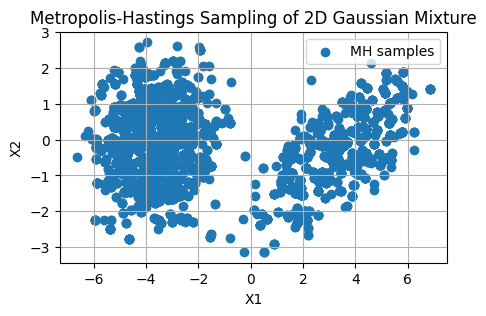

In [ ]:
"""
dim = 2 -- K = 2 -- num_samples = 5000
target_mu =np.zeros((dim,K)) -- target_mu[:,0] =[4,0] -- target_mu[:,1] =[-4,0]
target_sigma =np.zeros((dim, dim, K)) -- target_sigma[:,:,0] = [[2,1],[1,1]] -- target_sigma[:,:,1] = [[1,0],[0,1]] -- target_pi = np.array([0.4, 0.6])

proposal_mu = np.zeros((dim,1)).flatten()
proposal_sigma = 10*np.eye(dim)

mhg = mh_gauss(dim, K, num_samples, target_mu, target_sigma, target_pi, proposal_mu, proposal_sigma)
mhg.sample()
"""

**Importance Sampling**

Importance Sampling (IS) is a Monte Carlo algorithm for estimating integrals.

$E[f(x)] = \int p(x) f(x) \, dx$

$ E[f(x)] = \int \frac{p(x)}{q(x)} f(x) q(x) \, dx = E_{q} [w(x)f(x)] $

$ p(x) \propto x^{k-1} \exp\left\{-\frac{x^2}{2}\right\}, \quad x \ge 0 $

$q(x) \sim N(x; 0.8, 1.5)$


$
\begin{aligned}
&\textbf{{Metropolis-Hastings (MH) Algorithm:}} \\
&\text{Class } ImportanceSampler: \\
&\quad \text{Function } \text{sample}(N): \\
&\quad\quad \text{for } i = 1 \text{ to } N: \\
&\quad\quad\quad x_i \sim q(x) = \mathcal{N}(x; \mu, \sigma^2) && \text{(Samples from proposal)} \\
&\quad\quad\quad w(x_i) = \frac{p(x_i)}{q(x_i)} && \text{(Compute importance weights)} \\
&\quad\quad \text{end for} \\
&\quad\quad \mathbb{E}[f(x)] = \frac{1}{N} \sum_{i=1}^{N} w(x_i) f(x_i) && \text{(Estimate expectation)} \\
&\quad\quad \textbf{return } \mathbf{w}, \mathbb{E}[f(x)]
\end{aligned}
$

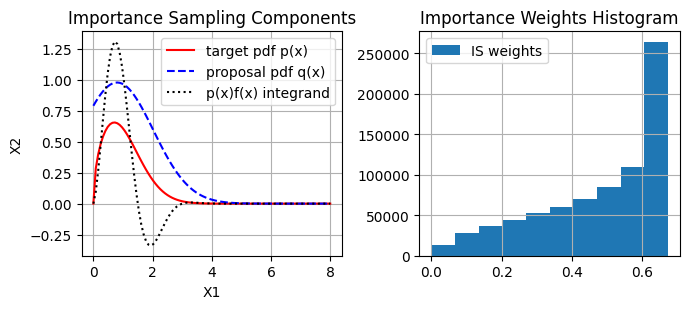

In [ ]:
""" Importance Sampling Components and Importance Weights Histogram """

For more complex distributions we do not use normalized proposal distribution.

**Let's define a normalized PDF** $p(x)$ and $q(x)$:
\begin{align*}
    p(x) &= \frac{1}{Z_p} \hat{p}(x) \\
    q(x) &= \frac{1}{Z_q} \hat{q}(x)
\end{align*}


$Z_p$ and $Z_q$ are normalizing constants of $p(x)$ and $q(x)$, and $\hat{p}(x)$ and $\hat{q}(x)$ are unnormalized distributions. **We write the estimates as**:

\begin{equation*}
E[f(x)] = \int f(x) p(x) dx = \int f(x) \frac{q(x)}{q(x)} p(x) dx
\end{equation*}

\begin{equation*}
= \int f(x) \frac{\hat{p}(x)}{\hat{q}(x)} q(x) dx \approx \frac{Z_q}{Z_p} \frac{1}{S} \sum \hat{w}(s) f(s)
\end{equation*}

**where** $s \sim q(x)$ and $w(s) = \frac{\hat{p}(s)}{\hat{q}(s)}$.


**We compute the ratio of normalizing constants**:
\begin{equation*}
\frac{Z_p}{Z_q} = \frac{1}{Z_q} \int \hat{p}(x) dx = \frac{1}{Z_q} \int \frac{\hat{p}(x)}{\hat{q}(x)} q(x) dx = \int \frac{\hat{p}(x)}{\hat{q}(x)} q(x) dx = \frac{1}{S} \sum \hat{w}(s)
\end{equation*}


**Combining all the above we get**:
\begin{equation*}
E[f(x)] = \frac{Z_q}{Z_p} \frac{1}{S} \sum \hat{w}(s) f(s) = \sum_{i=1}^{S} w(s) f(s)
\end{equation*}


Let's look at our importance sampling estimator and **compute the quantities relevant to the performance of the Importance Sampling estimator**:

\begin{equation*}
\hat{a} = E[a(x)] = \frac{\frac{1}{n} \sum \hat{w}_i a(x_i)}{\frac{1}{n} \sum \hat{w}_i} = \frac{1}{n} \sum w^*_i a(x_i)
\end{equation*}


where $w^*_i = \frac{\hat{w}_i}{\frac{1}{n} \sum \hat{w}_i}$.

By the Weak Law of Large Numbers (WLLN), assuming independent samples $x_i$, we know that the average of i.i.d. samples converges in probability to the true mean:

\begin{equation*}
a = E[w^*(X_i) a(X_i)] \implies b(\hat{a}) = E[\hat{a}] - a = 0
\end{equation*}


$X_i$ are i.i.d. distributed according to $q(x)$. **Variance is given by**:
\begin{equation*}
VAR(\hat{a}) = \frac{\sigma^2}{n} = \frac{1}{n} \left( \sum (\hat{w}_i (a(x_i) - \hat{a}))^2 \right)
\end{equation*}


**Importance Sampling estimator converges to its true value in probability**:
\begin{equation*}
\lim_{n \to \infty} P(|\hat{a}_n - a| > \epsilon) = 0
\end{equation*}

**Using Chebyshev's inequality**:
\begin{equation*}
\lim_{n \to \infty} P(|\hat{a} - a| > \epsilon) \le \frac{Var(\hat{a})}{\epsilon^2} = \frac{\sigma^2}{n \cdot \epsilon^2} = 0
\end{equation*}